# DSE 200 FINAL PROJECT - by Leslie Joe
## UCSD Fall 2021
### Python for Data Anlaysis, taught by Dr. İlkay Altıntaş
### Due Date:  December 3rd, 2021

***

<span style="color:gray">This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting.</span>

<span style="color:gray">There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.</span>

***

# Table of Contents<a id="toc"></a>
1. [Finding datasets to use](#Findingdatasetstouse)
    1. ["Triple Crown Races (2005 - 2019)"](#triplecrownracing)
    2. ["Horse Racing Data from 1990"](#horseracingdata)
2. [Obtaining the datasets I need](#obtaining)
    3. [Creating the datasets to merge along trainer names](#createtrainers)
    4. [Creating the datasets to merge along jockey names](#createjockeys)
3. [Exploring up the datasets](#Exploring)
    5. [Cleaning and understanding TCR for the trainers merge](#cleanTCRtrainers)
    6. [Cleaning and understanding TCR for the jockeys merge](#cleaningTCRjockeys)
    7. [Cleaning and understanding main for the trainers merge](#cleaningmaintrainers)
    8. [Cleaning and understanding main for the jockeys merge](#cleaningmainjockeys)
       1. [A small tangent](#tangent)
       2. [Back to cleaning](#return)
4. [Research question: Can I predict the Odds?](#question)
    9. [Merging TCR and main dataframes](#merging)
    10. [Machine learning models](#modeling)
        3. [Linear Regression](#LR)
        4. [Elastic Net](#EN)
        5. [Decision Tree Regressor](#DTR)
    11. [Executing the Machine Learning Models](#execute)
        6. [Modeling based on trainer names](#trainermodels)
        7. [Modeling based on jockey names](#jockeymodels)
5. [Observing the results](#results)
    12. [Visual observations of the predicted vs actual output](#visualobservations)
    13. [Mean squared errors and coefficients of determination](#mse_r2)
6. [Conclusions](#conclusions)

***

## <span style="color:gray">Step 1: Find a dataset or datasets</span>

<span style="color:gray">Based on your interest, identify a dataset which you will want to examine.  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.</span>


<span style="color:gray">This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask. You are expected to use at least two interconnected datasets, e.g., two tables in one database or a combination of datasets which you can merge in some meaningful way.<span>


[comment]: <> (#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION)
***

# Finding datasets to use <a id="Findingdatasetstouse"></a>

## "Triple Crown Races (2005 - 2019)" <a id="triplecrownracing"></a>
by Joseph (jmolitoris) on [Kaggle](https://www.kaggle.com/jmolitoris/triple-crown-of-horse-races-2005-2019?select=TripleCrownRaces_2005-2019.csv)
Results of the Kentucky Derby, Preakness, and Belmont Stakes 
* TripleCrownRaces_2005-2019.csv

#### Column descriptions from the Kaggle page:
**final_place** - finishing position at the event<br>
**PP** - pole position (starting spot)<br>
**Horse** - name of the horse<br>
**Jockey** - name of the jockey<br>
**Trainer** - name of the trainer<br>
**Odds** - decimal odds of winning at the start of the race<br>
**Win** - payout of a win bet (in USD)<br>
**Place** - payout of a place bet (in USD)<br>
**Show** - payout of a show bet (in USD)<br>
**year** - year of the race<br>
**race** - name of the race

## "Horse Racing Data from 1990" <a id="horseracingdata"></a>
by Nikolay Kashavkin (hwaitt) on [Kaggle](https://www.kaggle.com/hwaitt/horse-racing?select=horses_2019.csv)
* horses_2005.csv
* horses_2006.csv
* horses_2007.csv
* horses_2008.csv
* horses_2009.csv
* horses_2010.csv
* horses_2011.csv
* horses_2012.csv
* horses_2013.csv
* horses_2014.csv
* horses_2015.csv
* horses_2016.csv
* horses_2017.csv
* horses_2018.csv
* horses_2019.csv

#### Column descriptions from the Kaggle page:
**rid** - Race id<br>
**horseName** - Horse name<br>
**age** - Horse age<br>
**saddle** - Saddle # where horse starts<br>
**decimalPrice** - 1/Decimal price (or decimal odds, relating to how much is paid should the horse win)<br>
**isFav** - Was horse favorite before start? Can be more than one fav in a race<br>
**trainerName** - Trainer name<br>
**jockeyName** - Jockey name<br>
**position** - Finishing position, 40 if horse didn't finish<br>
**positionL** - how far a horse has finished from a the pursued<br>
**dist** - how far a horse has finished from a winner<br>
**weightSt** - Horse weight in Stones<br>
**weightLb** - Horse weight in pounds<br>
**overWeight** - Overweight code<br>
**outHandicap** - Handicap<br>
**headGear** - Head gear code<br>
**RPR** - Racing Post Rating (their speed to weight rating)<br>
**TR** - Topspeed<br>
**OR** - Official Rating<br>
**father** - Horse's Father name<br>
**mother** - Horse's Mother name<br>
**gfather** - Horse's Grandfather name<br>
**runners** - Runners total<br>
**margin** - Sum of decimalPrices for the race<br>
**weight** - Horse weight in kg<br>
**res_win** - Horse won or not<br>
**res_place** - Horse placed or not

To run this notebook, please download and extract the 15 `horses_{year}.csv` "Horse Racing Data from 1990" files and download the one `TripleCrownRaces_2005-2019.csv` "Triple Crown Races (2005 - 2019)" file to a folder named "CSVs" that is in the same directory as this notebook.

(Note: The csv files from "Horse Racing Data from 1990" download as ZIP files with the one csv compressed inside. Each year's csv file will need to be extracted. The full 16 files as downloaded from Kaggle can also be found in my Google Drive already extracted [here](https://drive.google.com/drive/folders/1OproMnKVKHkhltsIMQaSfzOdpYjiU6uo))


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor

seed = 16

# Obtaining the datasets I need <a id="obtaining"></a>

These datasets are on horse racing and many potential aspects that may contribute to a horse's chance of winning first place and subsequent pay. In both Kaggle projects, the CSV files I'm interested in contain information about the horses themselves and the terms surrounding the races they participate in, including the horse's trainer and the jockey involved. From my experience horseback riding, the trainer and the rider (jockey) are the most influential aspects on how a horse performs at any given time. Because of this, I will be using the trainer and jockey columns to merge "Triple Crown Races" and "Horse Racing Data from 1990."

To do this, I will need to both expand and scale down downloaded datasets. Specifically, I will need to combine multiple "Horse Racing Data from 1990" due to them being separated into files by year, and I will need to remove rows from "Horse Racing Data from 1990" and "Triple Crown Races" if there are no trainer or jockey names overlap with one another.

Since the "Triple Crown Racing" (TCR) dataset only includes information between the years of 2005 and 2019, I reduce the number of years observed from "Horse Racing Data from 1990" (main) to 2005 to 2019. Then because I'm using trainer and jockey names to combine these datasets, I can only use rows in TCR and main where the trainer's name or the jockey's name appear in both datasets.

## Creating the datasets to merge along trainer names <a id="createtrainers"></a>
To accomplish this, I use pandas in the following code:

In [10]:
''' Find the list of trainer names in the smaller TCR '''
tcr_trainers = pd.read_csv("CSVs/TripleCrownRaces_2005-2019.csv")
tcrTrainersList = tcr_trainers['Trainer'].unique()

yearRange = np.linspace(2005,2019,15, dtype=int)
for yr in yearRange:
    ''' Filter for rows with matching trainer names for the years of 2005-2019 '''
    mainYearly_trainers = pd.read_csv("CSVs/horses_"+str(yr)+".csv", low_memory=False)
    mainYearly_trainers = mainYearly_trainers[mainYearly_trainers['trainerName'].isin(tcrTrainersList)]

    ''' Create/add onto the dataframe with filtered trainer names '''
    if yr == yearRange[0]:
        main_trainers = mainYearly_trainers
    else:
        main_trainers = main_trainers.append(mainYearly_trainers)

    del mainYearly_trainers
del yearRange, tcrTrainersList

main_trainers = main_trainers.reset_index(drop=True)
# main_trainers.to_csv("CSVs/main_trainers.csv", index=False)

''' Filter TCR '''
tcr_trainers = tcr_trainers[tcr_trainers['Trainer'].isin(main_trainers['trainerName'].unique())].reset_index(drop=True)
# tcr_trainers.to_csv("CSVs/tcr_trainers.csv", index=False)

print("When filtering by trainers, the main dataframe is", main_trainers.shape, 
      "and the TCR dataframe is", tcr_trainers.shape)

When filtering by trainers, the main dataframe is (37756, 27) and the TCR dataframe is (256, 11)




## Creating the dataset to merge along jockey names <a id="createjockeys"></a>

To filter the original Kaggle downloads for the jockey's name merge, I use the following code:

In [11]:
''' Find the list of jockey names in the smaller TCR '''
tcr_jockeys = pd.read_csv("CSVs/TripleCrownRaces_2005-2019.csv")
tcrJockeysList = tcr_jockeys['Jockey'].unique()

yearRange = np.linspace(2005,2019,15, dtype=int)
for yr in yearRange:
    ''' Filter for rows with matching jockey names for the years of 2005-2019 '''
    mainYearly_jockeys = pd.read_csv("CSVs/horses_"+str(yr)+".csv", low_memory=False)
    mainYearly_jockeys = mainYearly_jockeys[mainYearly_jockeys['jockeyName'].isin(tcrJockeysList)]

    ''' Create/add onto the dataframe with filtered jockey names '''
    if yr == yearRange[0]:
        main_jockeys = mainYearly_jockeys
    else:
        main_jockeys = main_jockeys.append(mainYearly_jockeys)

    del mainYearly_jockeys
del yearRange, tcrJockeysList

main_jockeys = main_jockeys.reset_index(drop=True)
# main_jockeys.to_csv("CSVs/main_jockeys.csv", index=False)

''' Filter TCR '''
tcr_jockeys = tcr_jockeys[tcr_jockeys['Jockey'].isin(main_jockeys['jockeyName'].unique())].reset_index(drop=True)
# tcr_jockeys.to_csv("CSVs/tcr_jockeys.csv", index=False)

print("When filtering by jockeys, the main dataframe is", main_jockeys.shape, 
      "and the TCR dataframe is", tcr_jockeys.shape)

When filtering by jockeys, the main dataframe is (56510, 27) and the TCR dataframe is (249, 11)


***
[(Return to Table of Contents)](#toc)


## <span style="color:gray">Step 2: Explore the datasets</span><a id="step2"></a>

<span style="color:gray">In this step, you should explore what is present in the data and how the data is organized. You’ll need to determine what common features allow you to merge the datasets.</span>

<span style="color:gray">You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:</span>

* <span style="color:gray">Are there quality issues in the dataset (noisy, missing data, etc.)? </span>
* <span style="color:gray">What will you need to do to clean and/or transform the raw data for analysis?</span>

<span style="color:gray">You are also expected to use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,</span>

* <span style="color:gray">How are the data distributed?</span>
* <span style="color:gray">What are some common trends?</span>
* <span style="color:gray">What are the relationships between variables in your datasets?</span>

***
[(Return to Table of Contents)](#toc)

# Exploring up the datasets <a id="Exploring"></a>

These downloaded datasets are well filled out, but there is still much data exploration and cleanup to be done.

To begin with, I'll need to delete the columns that *could* be merged across but aren't the trainer or jockey names because these aspects are not as strong an influence on a horse's showing, as I know from experience. Leaving these columns in risks our machine learning models accidentally learning from these aspects which is not ideal. Therefore, the columns for the horses' names, the year, race name/ID, and finish place/position will be deleted. Similarly, the jockey names will be deleted from the trainer-merging datasets, and the trainer names will be deleted from the jockey-merging datasets.

## Cleaning and understanding TCR for the trainers merge <a id="cleanTCRtrainers"></a>



In [12]:
tcr_trainers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   final_place  256 non-null    int64  
 1   PP           256 non-null    object 
 2   Horse        256 non-null    object 
 3   Jockey       256 non-null    object 
 4   Trainer      256 non-null    object 
 5   Odds         252 non-null    float64
 6   Win          256 non-null    float64
 7   Place        256 non-null    float64
 8   Show         256 non-null    float64
 9   year         256 non-null    int64  
 10  race         256 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 22.1+ KB


Here is where columns get deleted for too few useful values, object columns are converted to numeric columns (str to int), rows with null values are dropped, and many a graph are made to create a clean cleaned dataframe that I understand and can use for merging and machine learning.

Other than the `final_place` column which I keep for graphing purposes, I start by deleting the aforementioned columns that could potentially be merged across and then plot the remaining columns to understand them better.

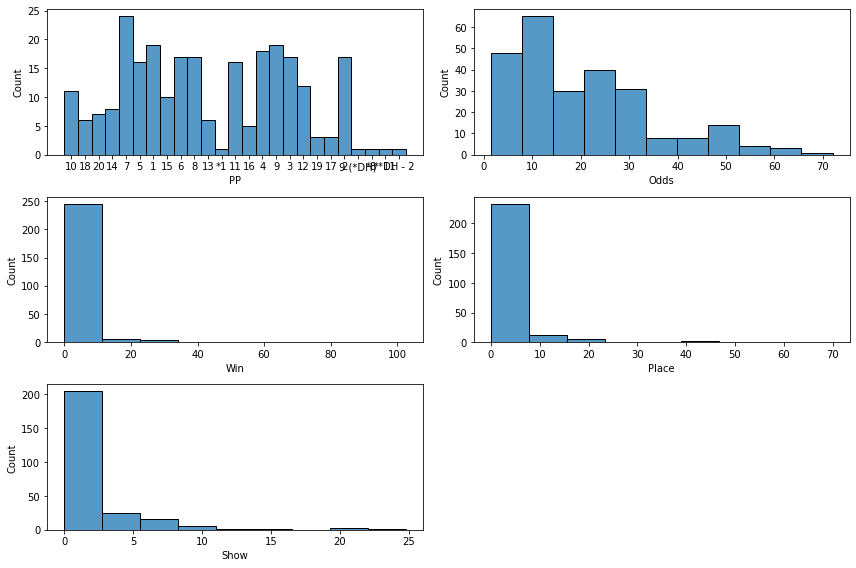

In [13]:
del tcr_trainers['Horse'], tcr_trainers['year'], tcr_trainers['race'], tcr_trainers['Jockey']

attributes = ['PP', 'Odds', 'Win', 'Place', 'Show']

fig, axes = plt.subplots(3, 2, figsize=(12,8), tight_layout=True)
for i in range(0,len(attributes)):
    sns.histplot(tcr_trainers[attributes[i]], ax=axes[int(i/2),i%2])
axes[2,1].axis('off')
plt.show()

Logically, a horse's pole position (`PP`) should be an integer describing which gate they begin the race at. Looking at the graph here, we see that indeed most entries are numbers with some variation. I use panda's `unique()` function to see what these obj (str) entries areI

In [14]:
tcr_trainers['PP'].unique()

array(['10', '18', '20', '14', '7', '5', '1', '15', '6', '8', '13', '*1',
       '11', '16', '4', '9', '3', '12', '19', '17', '2', '9 (*DH)', '*8',
       '**11', 'DH - 2'], dtype=object)

From my understanding of horse racing, the entries with asterisks can safely be converted to numbers as it still means the horse left from that position, but for some reason were spooked and backed out of their assigned original position and left through another which was recorded. The other entries are considered nonsensical and are removed, which then allows pandas to convert the column to an int type. Finally, I plot the resulting `PP` to visualize the distribution of data better.

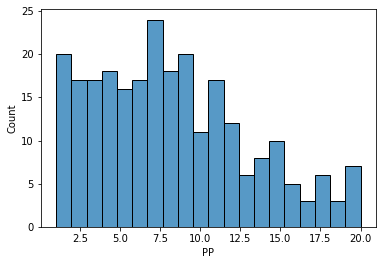

In [15]:
tcr_trainers[['PP']] = tcr_trainers[['PP']].replace('*1', '1').replace('*8', '8').replace('9 (*DH)', '9').replace('**11', '11')
tcr_trainers = tcr_trainers[tcr_trainers['PP'] != 'DH - 2']
tcr_trainers[['PP']] = tcr_trainers[['PP']].astype(int)

sns.histplot(tcr_trainers['PP'], bins=20)
plt.show()

I can also take a closer look at the `Win`, `Place`, and `Show` columns which are the winnings earned off a horse, so it's understandable the majority of outcomes in these three columns are 0 because winnings are only paid when the horse finishes in certain places. I graph just the winning amounts (non-zeros) using matplotlib and seaborn to see what this looks like and how many rows actually contain winnings information.

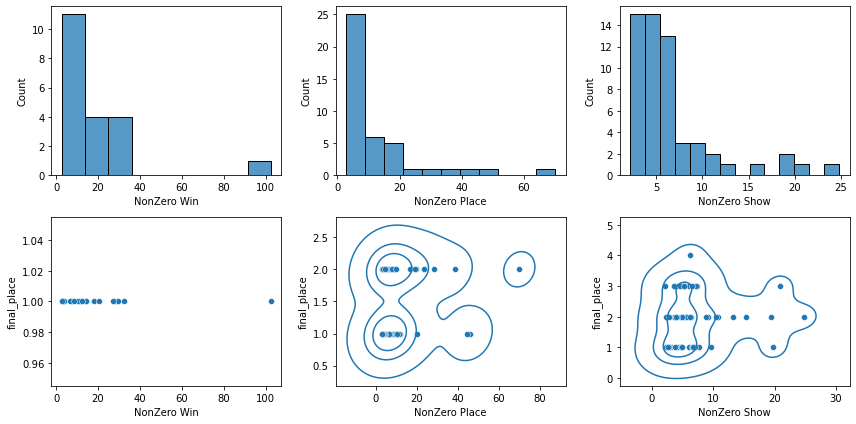

Number of entries in nonzero Wins: 20
Number of entries in nonzero Place: 42
Number of entries in nonzero Show: 57


In [16]:
fig, axes = plt.subplots(2, 3, figsize=(12,6), tight_layout=True)

winsWinnings_trainers = tcr_trainers[tcr_trainers['Win'] > 0]
placeWinnings_trainers = tcr_trainers[tcr_trainers['Place'] > 0]
showWinnings_trainers = tcr_trainers[tcr_trainers['Show'] > 0]
winsWinnings_trainers = winsWinnings_trainers.rename(columns={"Win": "NonZero Win"})
placeWinnings_trainers = placeWinnings_trainers.rename(columns={"Place": "NonZero Place"})
showWinnings_trainers = showWinnings_trainers.rename(columns={"Show": "NonZero Show"})

sns.histplot(winsWinnings_trainers['NonZero Win'], ax=axes[0,0])
sns.histplot(placeWinnings_trainers['NonZero Place'], ax=axes[0,1])
sns.histplot(showWinnings_trainers['NonZero Show'], ax=axes[0,2])

sns.scatterplot(data=winsWinnings_trainers, x='NonZero Win', y='final_place', ax=axes[1,0])
# sns.kdeplot(data=winsWinnings_trainers, x='NonZero Win', y='final_place', ax=axes[1,0], levels=3) #throws an error because 'final_place' only equals 1 here
sns.scatterplot(data=placeWinnings_trainers, x='NonZero Place', y='final_place', ax=axes[1,1])
sns.kdeplot(data=placeWinnings_trainers, x='NonZero Place', y='final_place', ax=axes[1,1], levels=4)
sns.scatterplot(data=showWinnings_trainers, x='NonZero Show', y='final_place', ax=axes[1,2])
sns.kdeplot(data=showWinnings_trainers, x='NonZero Show', y='final_place', ax=axes[1,2], levels=4)

plt.show()

print("Number of entries in nonzero Wins:", len(winsWinnings_trainers))
print("Number of entries in nonzero Place:", len(placeWinnings_trainers))
print("Number of entries in nonzero Show:", len(showWinnings_trainers))

With so few non-zero entries and because I will ultimately be using pre-finish data in my future machine learning models, I now delete the `Win`, `Place`, and `Show` columns. (And `final_place` now that it's served its graphing use.)

I drop any remaining rows with null values using pandas, and graph the tcr_trainers dataframe on a (tiny) pairplot for a final look at this now-clean dataframe in case any outliers were missed and to see the relationships and non-relationships.

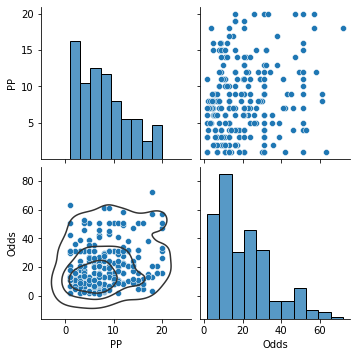

In [17]:
del tcr_trainers['Win'], tcr_trainers['Place'], tcr_trainers['Show']
del winsWinnings_trainers, placeWinnings_trainers, showWinnings_trainers, tcr_trainers['final_place']

tcr_trainers = tcr_trainers.dropna()
g = sns.pairplot(tcr_trainers[['PP', 'Odds']])
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()
del g

In [18]:
# tcr_trainers.to_csv("CSVs/tcr_trainers.csv", index=False)
tcr_trainers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 255
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PP       251 non-null    int32  
 1   Trainer  251 non-null    object 
 2   Odds     251 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 15.0+ KB


### Cleaning and understanding TCR for the jockeys merge <a id="cleaningTCRjockeys"></a>


In [19]:
tcr_jockeys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   final_place  249 non-null    int64  
 1   PP           249 non-null    object 
 2   Horse        249 non-null    object 
 3   Jockey       249 non-null    object 
 4   Trainer      249 non-null    object 
 5   Odds         243 non-null    float64
 6   Win          249 non-null    float64
 7   Place        249 non-null    float64
 8   Show         249 non-null    float64
 9   year         249 non-null    int64  
 10  race         249 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 21.5+ KB



Uneventfully, I follow the same steps and logic for cleaning tcr_jockeys. I delete the potential merge-able columns, transform `PP`, give `Win`, `Place`, and `Show` another chance but delete them for too few non-zero entries and not being a useful aspect in the future ML uses, drop NA rows, and graph a pairplot for a last look.

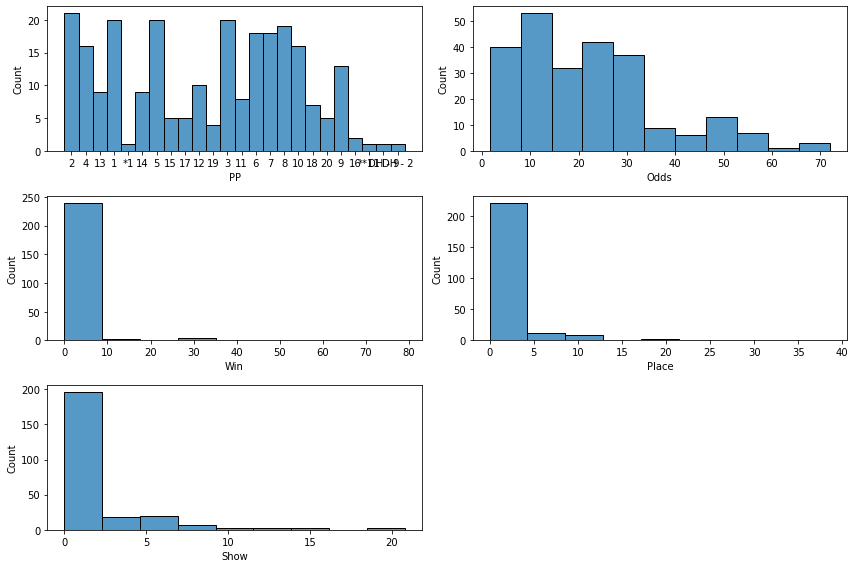

df is (249, 7)


In [20]:
del tcr_jockeys['Horse'], tcr_jockeys['year'], tcr_jockeys['race'], tcr_jockeys['Trainer']

attributes = ['PP', 'Odds', 'Win', 'Place', 'Show']

fig, axes = plt.subplots(3, 2, figsize=(12,8), tight_layout=True)
for i in range(0,len(attributes)):
    sns.histplot(tcr_jockeys[attributes[i]], ax=axes[int(i/2),i%2])
axes[2,1].axis('off')
plt.show()

print("df is", tcr_jockeys.shape)

In [21]:
tcr_jockeys['PP'].unique()

array(['2', '4', '13', '1', '*1', '14', '5', '15', '17', '12', '19', '3',
       '11', '6', '7', '8', '10', '18', '20', '9', '16', '**11', 'DH - 9',
       'DH - 2'], dtype=object)

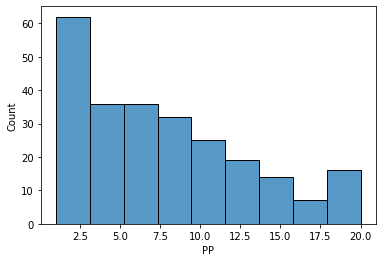

df is (247, 7)


In [22]:
tcr_jockeys[['PP']] = tcr_jockeys[['PP']].replace('*1', '1').replace('**11', '11')
tcr_jockeys = tcr_jockeys[~tcr_jockeys['PP'].isin(['DH - 2', 'DH - 9'])]
tcr_jockeys[['PP']] = tcr_jockeys[['PP']].astype(int)

sns.histplot(tcr_jockeys['PP'])
plt.show()

print("df is", tcr_jockeys.shape)

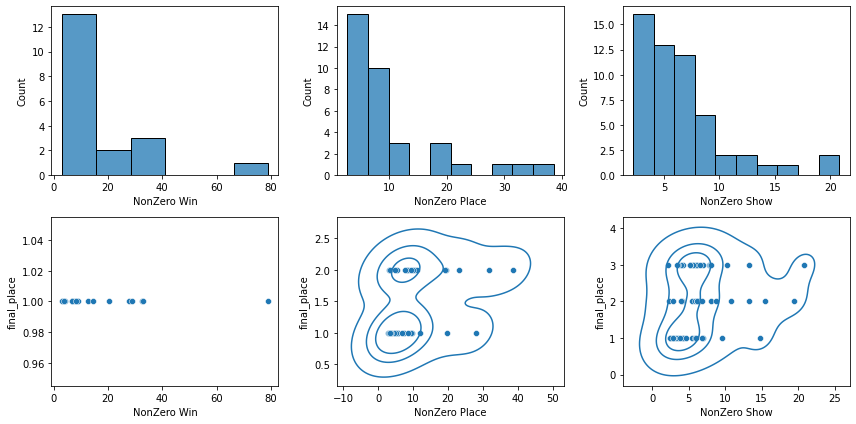

Number of entries in nonzero Wins: 19
Number of entries in nonzero Place: 35
Number of entries in nonzero Show: 55


In [23]:
fig, axes = plt.subplots(2, 3, figsize=(12,6), tight_layout=True)

winsWinnings_jockeys = tcr_jockeys[tcr_jockeys['Win'] > 0]
placeWinnings_jockeys = tcr_jockeys[tcr_jockeys['Place'] > 0]
showWinnings_jockeys = tcr_jockeys[tcr_jockeys['Show'] > 0]
winsWinnings_jockeys = winsWinnings_jockeys.rename(columns={"Win": "NonZero Win"})
placeWinnings_jockeys = placeWinnings_jockeys.rename(columns={"Place": "NonZero Place"})
showWinnings_jockeys = showWinnings_jockeys.rename(columns={"Show": "NonZero Show"})

sns.histplot(winsWinnings_jockeys['NonZero Win'], ax=axes[0,0])
sns.histplot(placeWinnings_jockeys['NonZero Place'], ax=axes[0,1])
sns.histplot(showWinnings_jockeys['NonZero Show'], ax=axes[0,2])

sns.scatterplot(data=winsWinnings_jockeys, x='NonZero Win', y='final_place', ax=axes[1,0])
# sns.kdeplot(data=winsWinnings_jockeys, x='NonZero Win', y='final_place', ax=axes[1,0], levels=5) #throws an error because 'final_place' only equals 1 here
sns.scatterplot(data=placeWinnings_jockeys, x='NonZero Place', y='final_place', ax=axes[1,1])
sns.kdeplot(data=placeWinnings_jockeys, x='NonZero Place', y='final_place', ax=axes[1,1], levels=4)
sns.scatterplot(data=showWinnings_jockeys, x='NonZero Show', y='final_place', ax=axes[1,2])
sns.kdeplot(data=showWinnings_jockeys, x='NonZero Show', y='final_place', ax=axes[1,2], levels=4)

plt.show()

print("Number of entries in nonzero Wins:", len(winsWinnings_jockeys))
print("Number of entries in nonzero Place:", len(placeWinnings_jockeys))
print("Number of entries in nonzero Show:", len(showWinnings_jockeys))

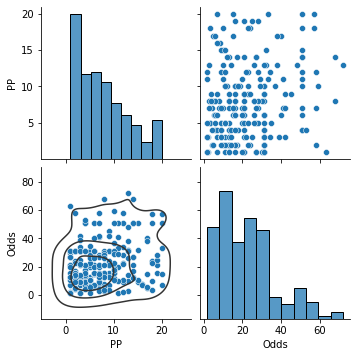

In [24]:
del tcr_jockeys['Win'], tcr_jockeys['Place'], tcr_jockeys['Show']
del winsWinnings_jockeys, placeWinnings_jockeys, showWinnings_jockeys, tcr_jockeys['final_place']
tcr_jockeys = tcr_jockeys.dropna()

tcr_jockeys = tcr_jockeys.dropna()
g = sns.pairplot(tcr_jockeys[['PP', 'Odds']])
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()
del g

In [25]:
# tcr_jockeys.to_csv("CSVs/tcr_jockeys.csv", index=False)
tcr_jockeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 248
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PP      241 non-null    int32  
 1   Jockey  241 non-null    object 
 2   Odds    241 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 14.7+ KB


### Cleaning and understanding main for the trainers merge <a id="cleaningmaintrainers"></a>


In [26]:
main_trainers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37756 entries, 0 to 37755
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rid           37756 non-null  int64  
 1   horseName     37756 non-null  object 
 2   age           37756 non-null  float64
 3   saddle        26848 non-null  float64
 4   decimalPrice  37756 non-null  float64
 5   isFav         37756 non-null  int64  
 6   trainerName   37756 non-null  object 
 7   jockeyName    37756 non-null  object 
 8   position      37756 non-null  int64  
 9   positionL     31351 non-null  object 
 10  dist          25963 non-null  object 
 11  weightSt      37756 non-null  int64  
 12  weightLb      37756 non-null  int64  
 13  overWeight    1407 non-null   float64
 14  outHandicap   13 non-null     float64
 15  headGear      10288 non-null  object 
 16  RPR           34055 non-null  float64
 17  TR            10112 non-null  float64
 18  OR            7065 non-nul



Upon considering the column descriptions of main again, I noticed many columns that are redundant and can be deleted.
- `positionL` and `dist` measure the distance before and behind the horse to their nearest neighbor upon finishing which is not of interest to me for being a post-race aspect, and they are dependent on `rid`, `position`, and `horseName`, all of which have been deleted
- `weightSt` and `weightLb` are not needed if I keep `weight` (measured in kg)
- `margin` is dependent on `rid` and `decimalPrice`, so without `rid` this column is not needed if I keep `decimalPrice`
- `res_win` and `res_place` is dependent on `position` which has been deleted and measure post-race aspects when I'll be using pre-race aspects in the future ML modeling

I also delete `outHandicap`, `overWeight`, `headGear`, `OR`, and `TR` for not having enough non-null values.

Looking forward to the ML models, I'll need to save classification info like `father`, `mother`, and `gfather` in binary columns. For this reason, I look at the family member names to see if this is reasonable or feasible given the number of unique names.

In [27]:
del main_trainers['horseName'], main_trainers['rid'], main_trainers['jockeyName'], main_trainers['position']
del main_trainers['weightSt'], main_trainers['weightLb'], main_trainers['positionL'], main_trainers['dist'], main_trainers['margin'], main_trainers['res_win'], main_trainers['res_place']
del main_trainers['outHandicap'], main_trainers['overWeight'], main_trainers['headGear'], main_trainers['OR'], main_trainers['TR']

print("There are", len(main_trainers['father'].unique()), "different sire (father) names")
print("There are", len(main_trainers['mother'].unique()), "different mare (mother) names")
print("There are", len(main_trainers['gfather'].unique()), "different grand-sire (gfather) names")

There are 1294 different sire (father) names
There are 7716 different mare (mother) names
There are 1552 different grand-sire (gfather) names


Even if I only used the smallest of these—the father names—that would still require 1294 columns, and I most certainly will not be attempting such a feat. So, because these three columns are unusable for our purposes, I delete them.

Next, I plot the remaining columns (sans trainer names) in order to understand them better.

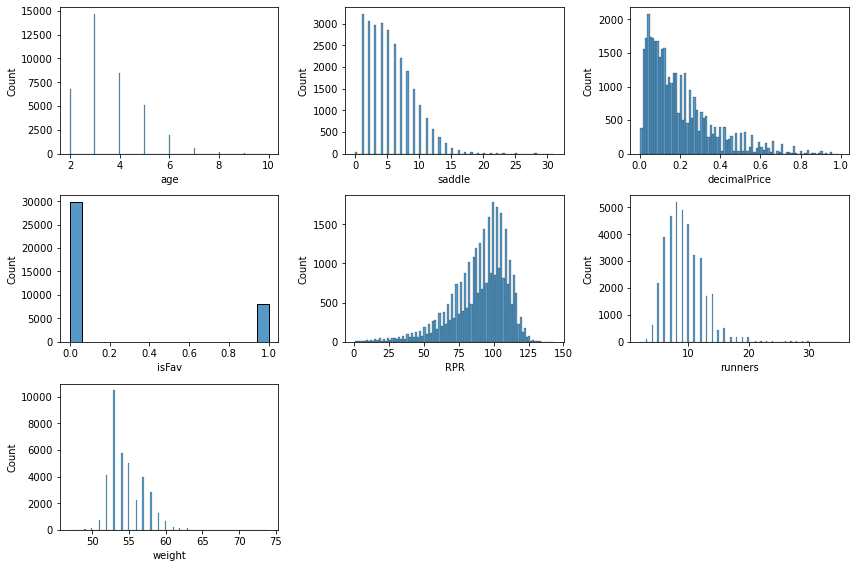

In [28]:
del main_trainers['father'], main_trainers['mother'], main_trainers['gfather']

attributes = ['age', 'saddle', 'decimalPrice',
              'isFav', 'RPR', 'runners',
              'weight']

fig, axes = plt.subplots(3, 3, figsize=(12,8), tight_layout=True)
for i in range(0,len(attributes)):
    sns.histplot(main_trainers[attributes[i]], ax=axes[int(i/3),i%3])
axes[2,1].axis('off')
axes[2,2].axis('off')
plt.show()

In [29]:
# main_trainers.to_csv("CSVs/main_trainers.csv", index=False)
main_trainers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37756 entries, 0 to 37755
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           37756 non-null  float64
 1   saddle        26848 non-null  float64
 2   decimalPrice  37756 non-null  float64
 3   isFav         37756 non-null  int64  
 4   trainerName   37756 non-null  object 
 5   RPR           34055 non-null  float64
 6   runners       37756 non-null  int64  
 7   weight        37756 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ MB


These look good, but there do appear to be many outliers and there are still columns with null values. However, this is still a good point to save the dataframe for use later when creating the ML models. During the modeling, I will be using different combinations of columns and therefore might not need to delete all the null rows seen in smaller columns like `saddle`.

The below graph helps visualize outliers. `isFav` is not plotted since it is a True/False representation.

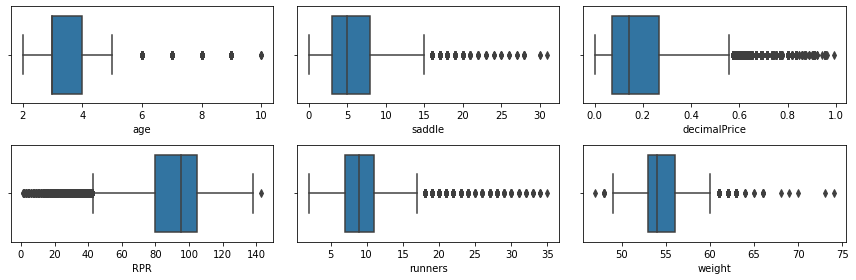

In [30]:
attributes = ['age', 'saddle', 'decimalPrice',
              'RPR', 'runners', 'weight']

fig, axes = plt.subplots(2, 3, figsize=(12,4), tight_layout=True)
for i in range(0,len(attributes)):
    sns.boxplot(x=main_trainers[attributes[i]], ax=axes[int(i/3),i%3])
plt.show()

The ML models might do better with outliers, or it might do better without outliers. For that reason, I create a copy of the dataframe to get rid of the datapoints that fall more than three standard deviations away from the mean.

I then make the pairplot of these columns and `isFav` for a final look at this now *very* clean dataframe and to see the relationships and non-relationships.

In [31]:
cleaned_trainers = main_trainers.copy()
cleaned_trainers = cleaned_trainers[(cleaned_trainers['age'] < (main_trainers['age'].mean()+main_trainers['age'].std()*3)) &
                        (cleaned_trainers['saddle'] < (main_trainers['saddle'].mean()+main_trainers['saddle'].std()*3)) &
                        (cleaned_trainers['decimalPrice'] < (main_trainers['decimalPrice'].mean()+main_trainers['decimalPrice'].std()*3)) &
                        (cleaned_trainers['runners'] < (main_trainers['runners'].mean()+main_trainers['runners'].std()*3)) &
                        (cleaned_trainers['weight'] < (main_trainers['weight'].mean()+main_trainers['weight'].std()*3)) &
                        (cleaned_trainers['weight'] > (main_trainers['weight'].mean()-main_trainers['weight'].std()*3)) ]

print("The main dataset to merge along trainer names now has the shape", cleaned_trainers.shape)

# g = sns.pairplot(cleaned_trainers[['age', 'saddle', 'decimalPrice', 'isFav', 'RPR', 'runners', 'weight']])
# g.map_lower(sns.kdeplot, levels=4, color=".2")
# plt.savefig('image/main_trainers_cleaned-pairplot.png')
# plt.show()
# del g

The main dataset to merge along trainer names now has the shape (25592, 8)


(Because this pairplot can take 6 minutes to graph, here's the saved + loaded PNG pairplot.)

<img src="images/main_trainers_cleaned-pairplot.png">

In [32]:
# cleaned_trainers.to_csv("CSVs/main_trainers_cleaned.csv", index=False)
cleaned_trainers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25592 entries, 0 to 37755
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           25592 non-null  float64
 1   saddle        25592 non-null  float64
 2   decimalPrice  25592 non-null  float64
 3   isFav         25592 non-null  int64  
 4   trainerName   25592 non-null  object 
 5   RPR           23256 non-null  float64
 6   runners       25592 non-null  int64  
 7   weight        25592 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.8+ MB


Based on this plot, I'm interested in utilizing the potential relationships between these columns when using machine learning on this dataset.
- age and decimalPrice
- age and isFav
- age and RPR
- decimalPrice and RPR
- decimalPrice and runners
- isFav and RPR

## Cleaning and understanding main for the jockeys merge <a id="cleaningmainjockeys"></a>



In [33]:
main_jockeys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56510 entries, 0 to 56509
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rid           56510 non-null  int64  
 1   horseName     56510 non-null  object 
 2   age           56510 non-null  float64
 3   saddle        43379 non-null  float64
 4   decimalPrice  56510 non-null  float64
 5   isFav         56510 non-null  int64  
 6   trainerName   56447 non-null  object 
 7   jockeyName    56510 non-null  object 
 8   position      56510 non-null  int64  
 9   positionL     47364 non-null  object 
 10  dist          39749 non-null  object 
 11  weightSt      56510 non-null  int64  
 12  weightLb      56510 non-null  int64  
 13  overWeight    2236 non-null   float64
 14  outHandicap   34 non-null     float64
 15  headGear      14171 non-null  object 
 16  RPR           51078 non-null  float64
 17  TR            21348 non-null  float64
 18  OR            12715 non-nu

As expected, I give the same treatment to main_jockeys as I did to main_trainers above, deleting redundant and small columns, as well as columns of classifications I can't use in future ML models, plotting the remaining int/float columns, and creating a copy before removing everything outside 3 standard deviations of the mean to save as a new dataframe.

But before I do all that, I'd like to show how I initially cleaned `position`, `positionL`, and `dist` columns before deleting them as they were useless to the future ML model.
#### A small tangent:<a id="tangent"></a>

[(skip)](#return)

To start, I use matplotlib to visualize the distributiong of data as histograms which can also indicate if maybe there *should* be a normal distribution but for some reason there is not.

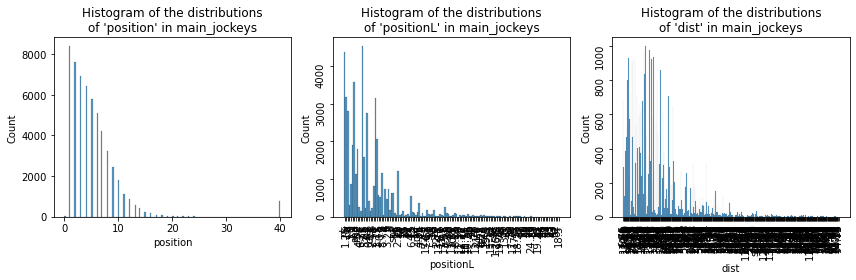

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12,4), tight_layout=True)
sns.histplot(main_jockeys['position'], ax=axes[0])
axes[0].set_title("Histogram of the distributions\nof 'position' in main_jockeys")
sns.histplot(main_jockeys['positionL'], ax=axes[1])
axes[1].tick_params(labelrotation=90)
axes[1].set_title("Histogram of the distributions\nof 'positionL' in main_jockeys")
sns.histplot(main_jockeys['dist'], ax=axes[2])
axes[2].tick_params(labelrotation=90)
axes[2].set_title("Histogram of the distributions\nof 'dist' in main_jockeys")
# plt.savefig('images/tangent-cleaningJockeysObjColumns.png')
plt.show()

As noted on the original Kaggle page, `position` is 40 if the horse didn't finish, so I remove those rows as 40 is effectively `null`. Then I use panda's `unique()` function to find the str entries in `positionL` and `dist` that should be removed before plotting the graph of three again.

In [35]:
main_jockeys = main_jockeys[main_jockeys['position'] < 40]

print(main_jockeys['positionL'].unique())
print(main_jockeys['dist'].unique())

['nk' nan '1.25' 'hd' '7' '3.5' '2' '.75' 'shd' 'nse' '4.75' '6.25' '.5'
 '2.5' '5.25' '1.5' '0.75' 'dist' '8' '2.75' '1' '1.75' '3.75' '0.5' '3'
 '8.75' '4' '6' '3.25' '9' '5' 'snk' '11' '19' '2.25' '20' '14' '10' '25'
 '18' '13' '27' '4.5' '6.75' '12' '16' 'dht' '4.25' '24' '7.75' '22.5'
 '15.25' '6.5' '9.5' '21' '15' '5.75' '29' '12.5' '13.75' '8.5' '11.5'
 '17.25' '5.5' '7.25' '9.25' '30' '13.25' '10.5' '7.5' '8.25' '98' '11.25'
 '12.25' '17' '10.75' '11.75' '10.25' '26' '40' '22' '28' '12.75' '21.5'
 '14.5' '.25' '0.25' '9.75' '15.5' '19.5' '23' '15.75' '34' '31' '1.25fs'
 '16.5' '38' '19.75' '45' '36' '13.5' '65' '41' '32' '39' '17.75' '17.5'
 '33' '18.25' '37' '42' '70' '35' '69' '58' '48' '24.75' '59' '63' '51'
 '19.25' '61' '44' '46' '81' '49' '54' '53' '93' '47' '43' '52' '67'
 '18.5']
['6.75' nan '10.0' '17.75' '16.0' '8.0' '15.75' '7.0' '6.0' '5.75' '16.75'
 '3.75' '11.0' '7.5' '6.25' '39.25' '19.25' '19.75' '3.5' '9.25' '4.75'
 '21.75' '34.75' '4.5' '2' '8.5' '38' '1.5' '9

My understanding of `positionL` and `dist` (similar to `PP` in tcr_trainers and tce_jockeys) tell me that these should be numeric entries and the string entries denote technicalities that can be ignored or removed altogether.

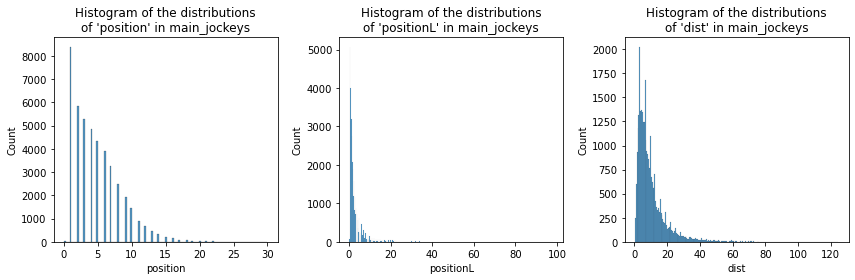

In [36]:
main_jockeys = main_jockeys[~main_jockeys['positionL'].isin(['nk', 'nse', 'sht-hd', 'snk', 'hd', 'shd', 'dist', 'dht'])]
main_jockeys[['positionL']] = main_jockeys[['positionL']].replace('1.25fs', '1.25')
main_jockeys[['positionL']] = main_jockeys[['positionL']].astype(float, copy=False)

main_jockeys = main_jockeys[~main_jockeys['dist'].isin(['nk', 'nse', 'sht-hd', 'snk', 'hd'])]
main_jockeys[['dist']] = main_jockeys[['dist']].astype(float, copy=False)

fig, axes = plt.subplots(1, 3, figsize=(12,4), tight_layout=True)
sns.histplot(main_jockeys['position'], ax=axes[0])
axes[0].set_title("Histogram of the distributions\nof 'position' in main_jockeys")
sns.histplot(main_jockeys['positionL'], ax=axes[1])
axes[1].set_title("Histogram of the distributions\nof 'positionL' in main_jockeys")
sns.histplot(main_jockeys['dist'], ax=axes[2])
axes[2].set_title("Histogram of the distributions\nof 'dist' in main_jockeys")
plt.show()



#### And now back to the mass-column deletion and cleanup of main_jockeys!<a id="return"></a>

I resume by deleting all the known-unwanted columns, and then I try `father`, `mother`, and `gfather` again in case using them is more feasible this time.

In [37]:
del main_jockeys['horseName'], main_jockeys['rid'], main_jockeys['trainerName'], main_jockeys['position']
del main_jockeys['weightSt'], main_jockeys['weightLb'], main_jockeys['positionL'], main_jockeys['dist'], main_jockeys['margin'], main_jockeys['res_win'], main_jockeys['res_place']
del main_jockeys['outHandicap'], main_jockeys['overWeight'], main_jockeys['headGear'], main_jockeys['OR'], main_jockeys['TR']

print("There are", len(main_jockeys['father'].unique()), "different sire (father) names")
print("There are", len(main_jockeys['mother'].unique()), "different mare (mother) names")
print("There are", len(main_jockeys['gfather'].unique()), "different grand-sire (gfather) names")

There are 2310 different sire (father) names
There are 17518 different mare (mother) names
There are 2555 different grand-sire (gfather) names


Because it is still not feasible with at least 2310 unique names, I delete these columns. Afterwards, I plot the int/float columns to better understand them.

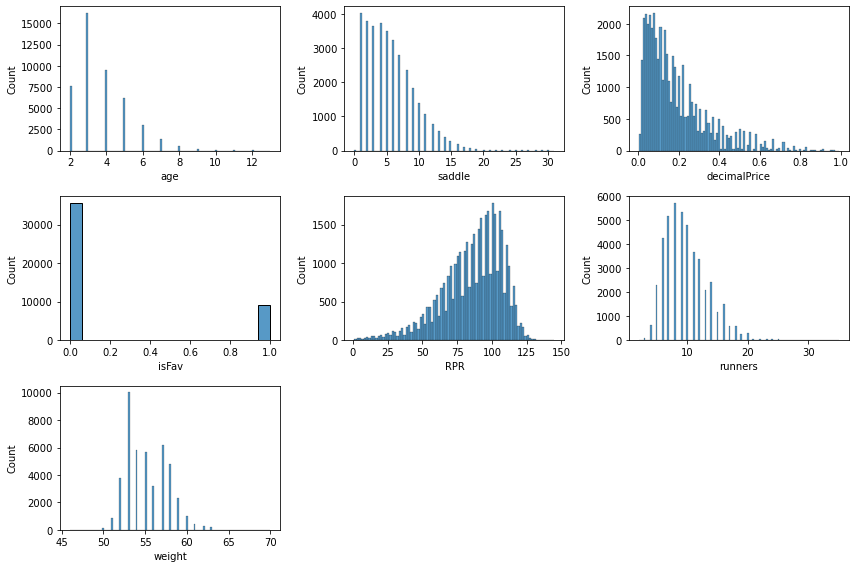

In [38]:
del main_jockeys['father'], main_jockeys['mother'], main_jockeys['gfather']

attributes = ['age', 'saddle', 'decimalPrice',
              'isFav', 'RPR', 'runners',
              'weight']

fig, axes = plt.subplots(3, 3, figsize=(12,8), tight_layout=True)
for i in range(0,len(attributes)):
    sns.histplot(main_jockeys[attributes[i]], ax=axes[int(i/3),i%3])
axes[2,1].axis('off')
axes[2,2].axis('off')
plt.show()

These look good, though not without outliers. I save this regardless as it might still be of interest to me with the ML models.

In [39]:
# main_jockeys.to_csv("CSVs/main_jockeys.csv", index=False)
main_jockeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44719 entries, 1 to 56509
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           44719 non-null  float64
 1   saddle        33934 non-null  float64
 2   decimalPrice  44719 non-null  float64
 3   isFav         44719 non-null  int64  
 4   jockeyName    44719 non-null  object 
 5   RPR           40857 non-null  float64
 6   runners       44719 non-null  int64  
 7   weight        44719 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.1+ MB


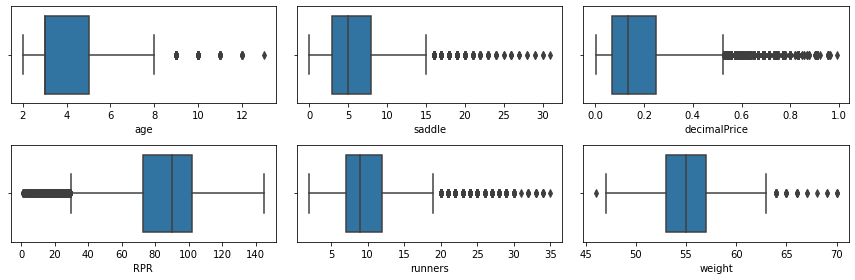

In [40]:
attributes = ['age', 'saddle', 'decimalPrice',
              'RPR', 'runners', 'weight']

fig, axes = plt.subplots(2, 3, figsize=(12,4), tight_layout=True)
for i in range(0,len(attributes)):
    sns.boxplot(x=main_jockeys[attributes[i]], ax=axes[int(i/3),i%3])
plt.show()

To get rid of outliers, I once again make a copy of the dataframe and then remove points that are more than three standard deviations away from the mean.

Lastly I then make the pairplot of these columns and `isFav` for a final look and to see the relationships and non-relationships.

In [41]:
cleaned_jockeys = main_jockeys.copy()
cleaned_jockeys = cleaned_jockeys[(cleaned_jockeys['age'] < (main_jockeys['age'].mean()+main_jockeys['age'].std()*3)) &
                        (cleaned_jockeys['saddle'] < (main_jockeys['saddle'].mean()+main_jockeys['saddle'].std()*3)) &
                        (cleaned_jockeys['decimalPrice'] < (main_jockeys['decimalPrice'].mean()+main_jockeys['decimalPrice'].std()*3)) &
                        (cleaned_jockeys['runners'] < (main_jockeys['runners'].mean()+main_jockeys['runners'].std()*3)) &
                        (cleaned_jockeys['weight'] < (main_jockeys['weight'].mean()+main_jockeys['weight'].std()*3)) &
                        (cleaned_jockeys['weight'] > (main_jockeys['weight'].mean()-main_jockeys['weight'].std()*3)) ]

print("The main dataset to merge along jockey names now has the shape", main_jockeys.shape)

# g = sns.pairplot(cleaned_jockeys[['age', 'saddle', 'decimalPrice', 'isFav', 'RPR', 'runners', 'weight']])
# g.map_lower(sns.kdeplot, levels=4, color=".2")
# plt.savefig('images/main_jockeys_cleaned-pairplot.png')
# plt.show()
# del g

The main dataset to merge along jockey names now has the shape (44719, 8)


(Because this pairplot can take 6 minutes to graph, here's the saved + loaded PNG pairplot.)

<img src="images/main_jockeys_cleaned-pairplot.png">

In [42]:
# cleaned_jockeys.to_csv("CSVs/main_jockeys_cleaned.csv", index=False)
cleaned_jockeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32329 entries, 1 to 56509
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           32329 non-null  float64
 1   saddle        32329 non-null  float64
 2   decimalPrice  32329 non-null  float64
 3   isFav         32329 non-null  int64  
 4   jockeyName    32329 non-null  object 
 5   RPR           30021 non-null  float64
 6   runners       32329 non-null  int64  
 7   weight        32329 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.2+ MB


Based on this plot, I'm interested in utilizing the potential relationships between these columns in the next step if possible.
- age and decimalPrice
- age and isFav
- age and RPR
- saddle and weight
- decimalPrice and RPR
- decimalPrice and runners
- isFav and RPR

***
[(Return to Table of Contents)](#toc)

## <span style="color:gray">Step 3:  Identify 1-3 research questions and perform analysis</span>

<span style="color:gray">Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:</span>

* <span style="color:gray">__Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.</span>

* <span style="color:gray">__Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?</span>

* <span style="color:gray">__Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.</span>

<span style="color:gray">__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.</span>




[comment]: <> (#OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION)
***
[(Return to Table of Contents)](#toc)


## Can I predict Odds from TCR using a combination of attributes from main and other TCR attributes?<a id="question"></a>
Can I predict the betting odds of a horse based on their age, the saddle they wear, decimal price, if they're a favorite before the race starts, Racing Post Rating, how many runners are needed for the horse, their weight, and their starting position using multiple linear regression machine learning?

Because Odds are measured as floats on a continuous line, I use regression rather than classification. And because I am using multiple inputs to predict the output, this will be multiple linear regression.

I strive to answer my proposed question by merging TCR and main dataframes along trainer or jockey names, and then fitting some combination of multiple dataframe columns (attributes) on multiple linear regression models to see what works best. I attempt to measure "what works best" by measuring the mean squared errors (MSE) and coefficients of determination (r$^2$) of three multiple linear regression models with various combinations of inputs to predict Odds. By using subsets of my merged dataframes to train and then test these models, I will also graph the actual Odds vs the predicted Odds as determined by these models. This should hopefully provide valuable insight into understanding what model is the best at predicting Odds.

Because I'm choosing to merge across trainer names or jockey names, these models will be used at least twice. On top of that, I also intend to use the main dataframes both before outliers are removed and after outliers are removed, meaning these models will be used at least four times total. Lastly, it's possible not all the attributes in the merged dataframe will be optimal to include when building these models. Therefore I use three possible combinations of attributes.
- All 8<br>`['age', 'saddle', 'decimalPrice', 'isFav', 'RPR', 'runners', 'weight', 'PP', 'Odds']`
- The 6 whose correlations in Step 2 interested me most<br>`['age', 'decimalPrice', 'isFav', 'RPR', 'runners', 'Odds']`
- The 7 that I personally think contribute most to a horse's Odds, based on my own experience as a horseback rider<br>`['age', 'saddle', 'isFav', 'RPR', 'weight', 'PP', 'Odds']`

In [43]:
all_attributes = ['age', 'saddle', 'decimalPrice', 'isFav', 'RPR', 'runners', 'weight', 'PP', 'Odds']
dataBased_attributes = ['age', 'decimalPrice', 'isFav', 'RPR', 'runners', 'Odds']
myExpBased_attributes = ['age', 'saddle', 'isFav', 'RPR', 'weight', 'PP', 'Odds']

This presents a total of 12 possible combinations to use when developing multiple linear regression models.

| name to merge on & tcrDF | mainDF           | attributes        |
|--------------------------|------------------|-------------------|
| Trainer: tcr_trainers    | cleaned_trainers | all               |
| Trainer: tcr_trainers    | cleaned_trainers | based on the data |
| Trainer: tcr_trainers    | cleaned_trainers | based on my exp   |
| Trainer: tcr_trainers    | main_trainers    | all               |
| Trainer: tcr_trainers    | main_trainers    | based on the data |
| Trainer: tcr_trainers    | main_trainers    | based on my exp   |
| Jockey: tcr_jockeys      | cleaned_jockeys  | all               |
| Jockey: tcr_jockeys      | cleaned_jockeys  | based on the data |
| Jockey: tcr_jockeys      | cleaned_jockeys  | based on my exp   |
| Jockey: tcr_jockeys      | main_jockeys     | all               |
| Jockey: tcr_jockeys      | main_jockeys     | based on the data |
| Jockey: tcr_jockeys      | main_jockeys     | based on my exp   |

With that understanding, the code to execute multiple linear regression models is made in a manner that will allow it to be called multiple times.

### Merging TCR and main dataframes<a id="merging"></a>

For this task, I use a left merge of TCR into main along either the trainer or jockey names. Doing this without collapsing (grouping) TCR by trainer or jockey names will expand the final dataset poorly, however, as seen by how it nearly multiples the length of the `main_trainers` dataframe by 10.

In [44]:
print("main_trainers is", len(main_trainers), "while a plain left-merge with tcr_trainers as-is is",
      len(main_trainers.merge(tcr_trainers, how='left', left_on='trainerName', right_on='Trainer')))

main_trainers is 37756 while a plain left-merge with tcr_trainers as-is is 370586


Instead, I group the TCR dataset by names, and saving the mode of the remaining columns using pandas. Should there be a tie, pandas takes the mean of the modes.

Using that grouped TCR dataframe, I can then merge it with main and then delete one of the "trainer/jockey name" columns.

In [45]:
def merge(nameType, tcrDF, mainDF, attributes): #nameType="Trainer" or "Jockey", cleanDF=True means cleaned_main df
    if nameType=="Trainer" or nameType=="Cleaned Trainer":
        tcrToMerge = tcrDF[['Trainer', 'PP', 'Odds']].groupby(['Trainer']).mean(pd.Series.mode).reset_index()
        merged = mainDF.merge(tcrToMerge, how='left', left_on='trainerName', right_on='Trainer')
        del merged['trainerName']
    else:
        tcrToMerge = tcrDF[['Jockey', 'PP', 'Odds']].groupby(['Jockey']).mean(pd.Series.mode).reset_index()
        merged = mainDF.merge(tcrToMerge, how='left', left_on='jockeyName', right_on='Jockey')
        del merged['jockeyName']
    
    del tcrToMerge
    
    return merged[attributes].dropna()

### Machine learning models<a id="modeling"></a>

The models I chose for this task are Standard Scaler Linear Regression and Elastic Net from the sklearn linear model library, and Decision Tree Regressor from the sklearn tree library. The LinearRegression and ElasticNet models both use standardized datasets, and all three models use training and testing subsets (both for the x-input variables and the y-output variables). I'll be using an 80:20 split of the merged dataframe for training and testing subsets. I use StandardScaler to fit and transform the training data-subset, and transform the testing data-subset.

This is done with the following code, but is only executed inside a function further down when everything is ready to be called 12 times.

#### Standard Scaler Linear Regression<a id="LR"></a>

From the sklearn library, I use LinearRegression to predict the test subset's Odds and then save the predicted Odds as well as the the MSE and r$^2$ scores.

In [46]:
def linearRegression(xTrainScaled, xTestScaled, yTrain, yTest):
    regressLR = LinearRegression()
    regressLR.fit(xTrainScaled, yTrain)

    yTestPredictLR = regressLR.predict(xTestScaled)
    mseTestedLR = mean_squared_error(yTestPredictLR, yTest)
    r2testScoreLR = r2_score(yTest, yTestPredictLR)
    
    return yTestPredictLR, mseTestedLR, r2testScoreLR

#### Standard Scaler Elastic Net<a id="EN"></a>

Following up Linear Regression, I try ElasticNet from sklearn and again save the its predicted Odds and MSE and r$^2$ scores.

In [47]:
def elasticNet(xTrainScaled, xTestScaled, yTrain, yTest, seed):
    regressEN = ElasticNet(random_state=seed)
    regressEN.fit(xTrainScaled, yTrain)

    yTestPredictEN = regressEN.predict(xTestScaled)
    mseTestedEN = mean_squared_error(yTestPredictEN, yTest)
    r2testScoreEN = r2_score(yTest, yTestPredictEN)

    return yTestPredictEN, mseTestedEN, r2testScoreEN

#### Decision Tree Regressor<a id="DTR"></a>

Because the Odds are floats (real continuous numbers) rather than classes, I use DecisionTreeRegressor and not DecisionTreeClassifier from the sklearn library.

I chose to test out a couple `max_leaf_nodes` for this model to see if there was an optimal number, and found that 9 was indeed the best fit. I demonstrate this here with the cleaned main dataframe with merging along trainer names and using all attributes, but the results are consistent across both trainer and jockey-name merges, all mainDF uses, and all attribute combinations.

Decision Tree Regressor MSEs are [21.06842227 18.3225559  17.10872702 16.05070069 15.23598688]
Decision Tree Regressor r2s are [0.63293867 0.6807781  0.70192585 0.72035915 0.73455337]


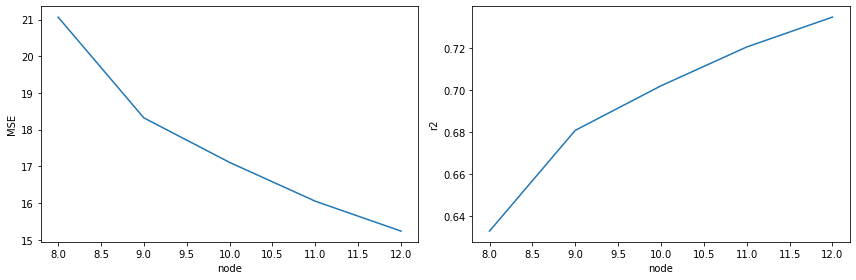

In [48]:
merged = merge("Trainer", tcr_trainers, cleaned_trainers, ['age', 'saddle', 'decimalPrice', 'isFav', 'RPR', 'runners', 'weight', 'PP', 'Odds'])
xTrain, xTest, yTrain, yTest = train_test_split(merged[['age', 'saddle', 'decimalPrice', 'isFav', 'RPR', 'runners', 'weight', 'PP']], merged[['Odds']], test_size=0.20, random_state=seed)

nodes = np.linspace(8,12,5, dtype=int)
dtrMSEs = np.zeros(len(nodes))
dtrR2s = np.zeros(len(nodes))

for i in range(len(nodes)):
    trainerNameClassifier = DecisionTreeRegressor(max_leaf_nodes=nodes[i], random_state=seed)
    trainerNameClassifier.fit(xTrain, yTrain)
    predictions = trainerNameClassifier.predict(xTest)

    yTestPredictDTR = trainerNameClassifier.predict(xTest)
    dtrMSEs[i] = mean_squared_error(yTestPredictDTR, yTest)
    dtrR2s[i] = r2_score(yTest, yTestPredictDTR)
print("Decision Tree Regressor MSEs are", dtrMSEs)
print("Decision Tree Regressor r2s are", dtrR2s)

dtrErrors = np.array([nodes,dtrMSEs,dtrR2s]).transpose()
dtrErrors = pd.DataFrame(data=dtrErrors, index=nodes, columns=["node", "MSE", "r2"])
fig, axes = plt.subplots(1, 2, figsize=(12,4), tight_layout=True)
sns.lineplot(data=dtrErrors, x='node', y='MSE', ax=axes[0])
sns.lineplot(data=dtrErrors, x='node', y='r2', ax=axes[1])

del merged, xTrain, xTest, yTrain, yTest, nodes, dtrMSEs, dtrR2s, trainerNameClassifier, predictions, yTestPredictDTR, dtrErrors

With the DecisionTreeRegressor, I once again fit with the training data and have the model predict the Odds of the testing data. Those predicted Odds are saved along with the MSE and r$^2$ scores.

In [49]:
def decisionTreeRegressor(xTrain, xTest, yTrain, yTest, node, seed):
    nameClassifier = DecisionTreeRegressor(max_leaf_nodes=node, random_state=seed)
    nameClassifier.fit(xTrain, yTrain)
    predictions = nameClassifier.predict(xTest)

    yTestPredictDTR = nameClassifier.predict(xTest)
    mseTestedDTR = mean_squared_error(yTestPredictDTR, yTest)
    r2testScoreDTR = r2_score(yTest, yTestPredictDTR)
        
    return yTestPredictDTR, mseTestedDTR, r2testScoreDTR

#### Graphing Predicted vs Actual Odds

In order to graph all three models' predicted Odds to compare against the actual Odds, I define three functions that can be called on multiple times.

In [50]:
def singlePlotYs(yTestPredict, yTest, goal, title):
    axes = pd.DataFrame(yTestPredict, columns = [goal]).reset_index().plot.scatter(x='index', y=goal, c='orange', label="predicted")
    yTest.reset_index(drop=True).reset_index().plot.scatter(x='index', y=goal, alpha=0.35, ax=axes, label="actual")
    plt.legend(loc="lower right")
    axes.set_title(title+" predicted vs actual Odds")
    plt.show()

def subplotYs(yTestPredict, yTestActual, goal, axes, ttl, titleAttributes):
    yToPlot = pd.DataFrame(yTestPredict, columns = [goal]).reset_index()
    yToPlot['Y Type'] = "Predicted"
    yToPlot = pd.concat([yTestActual, yToPlot]).reset_index(drop=True)
    sns.scatterplot(data=yToPlot, x='index', y=goal, ax=axes, hue='Y Type', alpha=0.2, edgecolor="none").set(title=ttl+" "+goal+" "+titleAttributes)
    handles, labels = axes.get_legend_handles_labels()
    axes.legend(handles=handles[0:], labels=labels[0:])

def yTestFixForPlotting(yTest):
    yTest = yTest.reset_index(drop=True).reset_index()
    yTest['Y Type'] = "Actual"
    return yTest

### Executing the machine learning models<a id="execute"></a>

In order to call on all 3 of these machine learning models 12 times *and* graph them all, I define one more function.

In [51]:
def machineLearningModels(nameType, tcrDF, mainDF, attributes, seed, errLength, titleAttributes): #(errLength=len(err))
    ''' merge the TCR with Main '''
    merged = merge(nameType, tcrDF, mainDF, attributes)
    goal = attributes[-1]
    attributes = attributes[:-1]

    ''' split for testing and training '''
    xTrain, xTest, yTrain, yTest = train_test_split(merged[attributes], merged[[goal]], test_size=0.20, random_state=seed)

    ''' scale for LR and EN '''
    scaler = StandardScaler()
    xTrainScaled = scaler.fit_transform(xTrain)
    xTestScaled = scaler.transform(xTest)

    ''' setting up for the plots '''
    fig, axes = plt.subplots(1, 3, figsize=(12,3), tight_layout=True)
    yTestToPlot = yTestFixForPlotting(yTest)
    errorsArray = np.zeros(errLength)

    
    ''' LR '''
    yTestPredictLR, errorsArray[0], errorsArray[1] = linearRegression(xTrainScaled, xTestScaled, yTrain, yTest)
    subplotYs(yTestPredictLR, yTestToPlot, goal, axes[0], nameType+"-merged Linear Regression\n", titleAttributes)

    ''' EN '''
    yTestPredictEN, errorsArray[2], errorsArray[3] = elasticNet(xTrainScaled, xTestScaled, yTrain, yTest, seed)
    subplotYs(yTestPredictEN, yTestToPlot, goal, axes[1], nameType+"-merged Elastic Net\n", titleAttributes)

    ''' DTR '''
    yTestPredictDTR, errorsArray[4], errorsArray[5] = decisionTreeRegressor(xTrain, xTest, yTrain, yTest, 9, seed)
    subplotYs(yTestPredictDTR, yTestToPlot, goal, axes[2], nameType+"-merged Decision Tree\nRegressor", titleAttributes)

    return errorsArray

This function returns an array that holds the MSEs and r$^2$s of the three models, as dependent on the name merged across, whether or not the main dataframe was the cleaned one or not, and which set of attributes were used.

To hold these results, I create a dataframe to use for `parallel_coordinates` plotting. Only one column is needed to start, but more columns will be added upon final execution.

In [52]:
indx = ["LR_MSE", "LR_r2",
        "EN_MSE", "EN_r2",
        "DTR_MSE", "DTR_r2"]
''' all  attributes = ['age', 'saddle', 'decimalPrice', 'isFav', 'RPR', 'runners', 'weight', 'PP', 'Odds'] #all
    data attributes = ['age', 'decimalPrice', 'isFav', 'RPR', 'runners', 'Odds'] #based on the data
    my   attributes = ['age', 'saddle', 'isFav', 'RPR', 'weight', 'PP', 'Odds'] #based on my exp
'''
err = np.zeros(len(indx)).transpose()
err = pd.DataFrame(data=err, index=indx, columns=["cleanTrainers_all"])
del indx
err

,cleanTrainers_all
LR_MSE,0.0
LR_r2,0.0
EN_MSE,0.0
EN_r2,0.0
DTR_MSE,0.0
DTR_r2,0.0


Finally, I call on these functions to model, fit, predict, and graph.

#### Modeling based on trainer names<a id="trainermodels"></a>

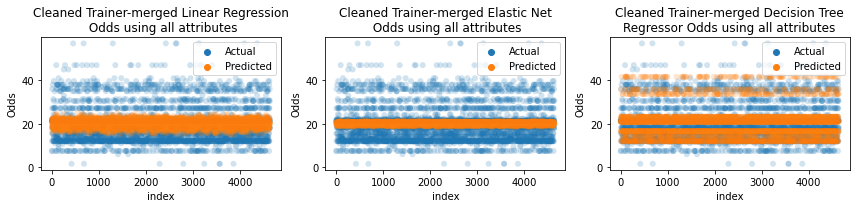

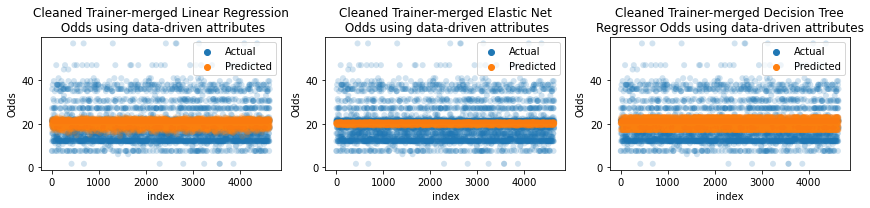

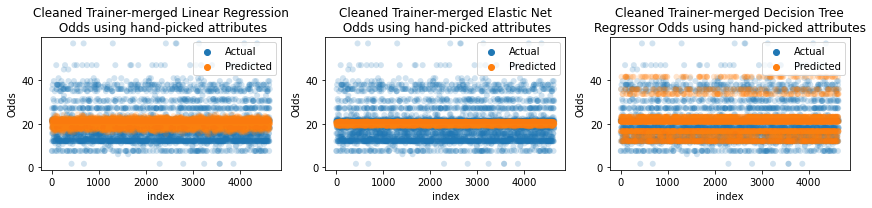

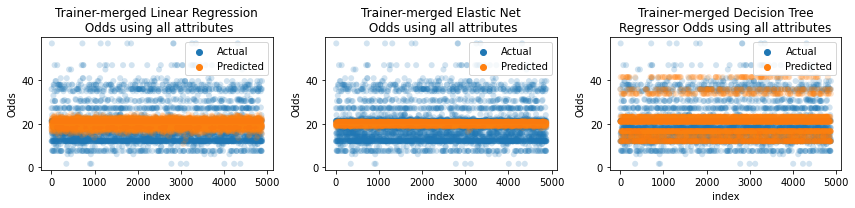

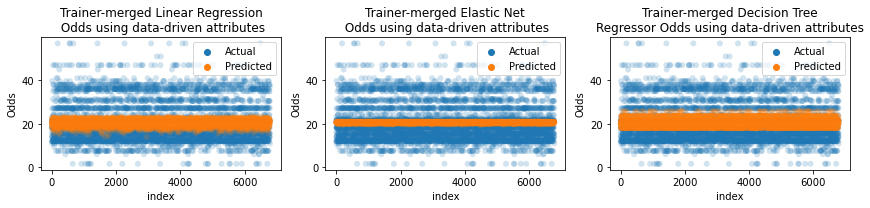

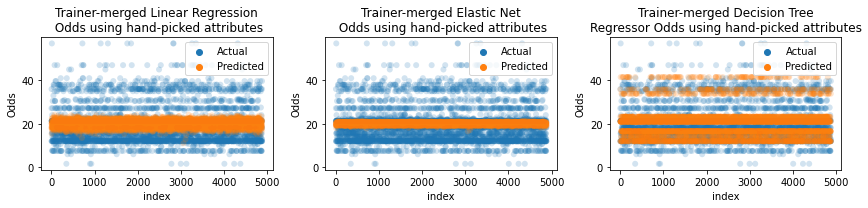

In [53]:
''' using the main dataframe without outliers '''
nameType = "Cleaned Trainer"
mainDF = cleaned_trainers

# using all attributes
err['cleanTrainers_all'] = machineLearningModels(nameType, tcr_trainers, mainDF, all_attributes, seed, len(err), "using all attributes")
# using attributes based on the data in step 2
err['cleanedTrainers_data'] = machineLearningModels(nameType, tcr_trainers, mainDF, dataBased_attributes, seed, len(err), "using data-driven attributes")
# using attributes based on my experience with horses
err['cleanedTrainers_exp'] = machineLearningModels(nameType, tcr_trainers, mainDF, myExpBased_attributes, seed, len(err), "using hand-picked attributes")


''' using the main dataframe that includes outliers '''
nameType = "Trainer"
mainDF = main_trainers

# using all attributes
err['Trainers_all'] = machineLearningModels(nameType, tcr_trainers, mainDF, all_attributes, seed, len(err), "using all attributes")
# using attributes based on the data in step 2
err['Trainers_data'] = machineLearningModels(nameType, tcr_trainers, mainDF, dataBased_attributes, seed, len(err), "using data-driven attributes")
# using attributes based on my experience with horses
err['Trainers_exp'] = machineLearningModels(nameType, tcr_trainers, mainDF, myExpBased_attributes, seed, len(err), "using hand-picked attributes")


#### Modeling based on jockey names<a id="jockeymodels"></a>

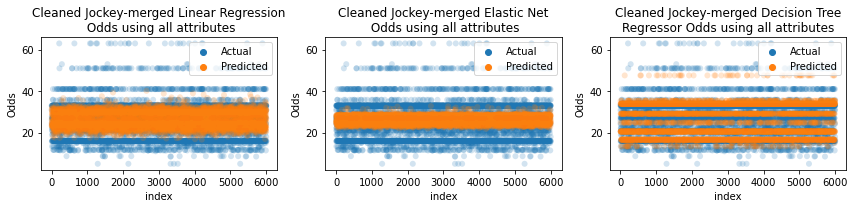

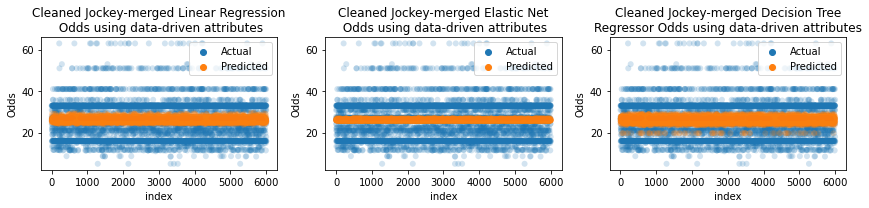

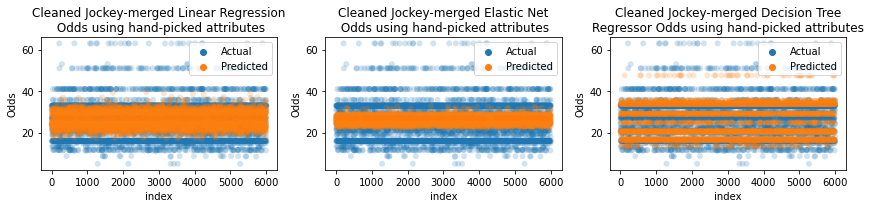

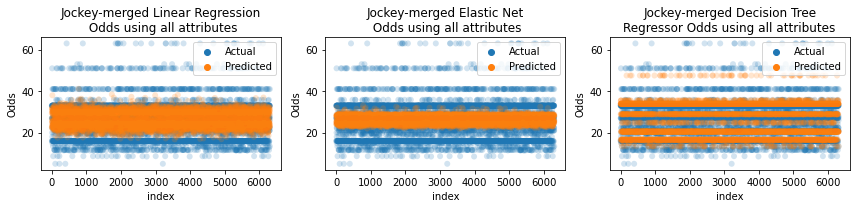

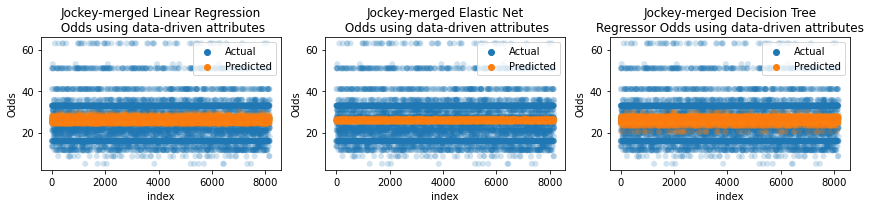

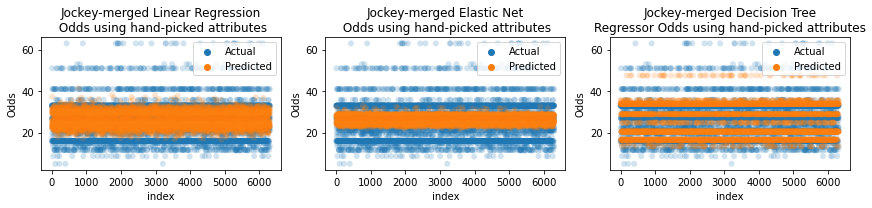

In [54]:
''' using the main dataframe without outliers '''
nameType = "Cleaned Jockey"
mainDF = cleaned_jockeys

# using all attributes
err['cleanJockeys_all'] = machineLearningModels(nameType, tcr_jockeys, mainDF, all_attributes, seed, len(err), "using all attributes")
# using attributes based on the data in step 2
err['cleanedJockeys_data'] = machineLearningModels(nameType, tcr_jockeys, mainDF, dataBased_attributes, seed, len(err), "using data-driven attributes")
# using attributes based on my experience with horses
err['cleanedJockeys_exp'] = machineLearningModels(nameType, tcr_jockeys, mainDF, myExpBased_attributes, seed, len(err), "using hand-picked attributes")


''' using the main dataframe that includes outliers '''
nameType = "Jockey"
mainDF = main_jockeys

# using all attributes
err['Jockeys_all'] = machineLearningModels(nameType, tcr_jockeys, mainDF, all_attributes, seed, len(err), "using all attributes")
# using attributes based on the data in step 2
err['Jockeys_data'] = machineLearningModels(nameType, tcr_jockeys, mainDF, dataBased_attributes, seed, len(err), "using data-driven attributes")
# using attributes based on my experience with horses
err['Jockeys_exp'] = machineLearningModels(nameType, tcr_jockeys, mainDF, myExpBased_attributes, seed, len(err), "using hand-picked attributes")


***
[(Return to Table of Contents)](#toc)


## <span style="color:gray">Step 4:  Present your findings</span>

<span style="color:gray">In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?  Use _matplotlib_ visualizations to present these findings.</span>


<span style="color:gray">__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.</span>


***
[(Return to Table of Contents)](#toc)

## Observing the results<a id="results"></a>

### Visual observations of the predicted vs actual output<a id="visualobservations"></a>

Please see the graphs directly above!

Based on the predicted vs actual Odds graphs above, I favor the LinearRegression and DecisionTreeRegressor models in nearly every instance. Both LinearRegression and ElasticNet typically keep their predictions to a very central line that is centered around the mean of the Odds in the merged dataframes. Meanwhile the DecisionTreeRegressor's predictions do reach higher and lower, spreading out to cover a wider range of Odds in most cases.

Beyond that, the predicted output from models that used the list of attributes based on correlations in [Step 2](#step2) of this project appear more compact around the average Odds than any list of attributes. Merging across trainer vs jockey names does appear to have as stark a difference, but the predicted outputs of the jockeys-merge do appear to have a wider range than those of the trainer-merge.

Lastly, the differences between using the cleaned main dataframes vs the outlier-inclusive main dataframes are not as distinct when looking at the graphs.

Before any final, concrete conclusions can be drawn, the MSEs and r$^2$s are plotted.

### Mean squared errors and coefficients of determination<a id="mse_r2"></a>

In [55]:
err = err.transpose().reset_index()
MSEs = err[['index', 'LR_MSE', 'EN_MSE', 'DTR_MSE']]
r2s = err[['index', 'LR_r2', 'EN_r2', 'DTR_r2']]

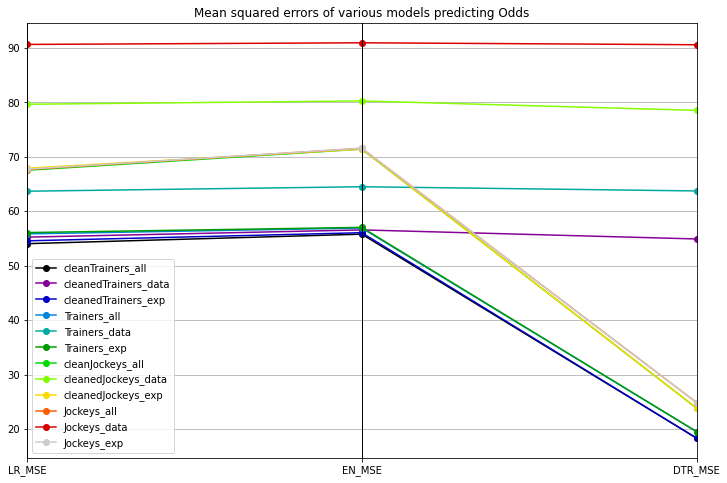

,index,DTR_MSE
0,cleanTrainers_all,18.322556
2,cleanedTrainers_exp,18.322556
3,Trainers_all,19.514079
5,Trainers_exp,19.514079
6,cleanJockeys_all,23.844625
8,cleanedJockeys_exp,23.844625
9,Jockeys_all,24.858023
11,Jockeys_exp,24.858023


In [56]:
plt.figure(figsize=(12,8))#.gca().axes.legend(loc="lower left")#.set_ylim([10,100])
g = pd.plotting.parallel_coordinates(MSEs, 'index', marker='o', colormap="nipy_spectral")
g.legend(loc="lower left")
g.set_title("Mean squared errors of various models predicting Odds")
plt.show()
MSEs[MSEs['DTR_MSE'] < 40][['index', 'DTR_MSE']]

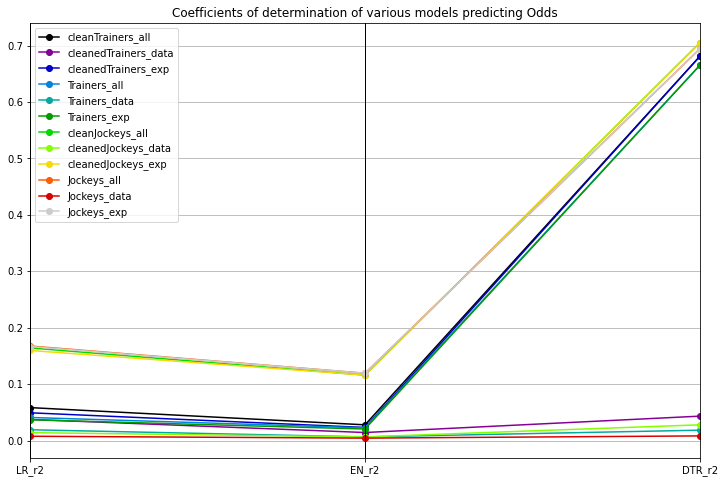

,index,DTR_r2
0,cleanTrainers_all,0.680778
2,cleanedTrainers_exp,0.680778
3,Trainers_all,0.664898
5,Trainers_exp,0.664898
6,cleanJockeys_all,0.704892
8,cleanedJockeys_exp,0.704892
9,Jockeys_all,0.694148
11,Jockeys_exp,0.694148


In [57]:
plt.figure(figsize=(12,8))
g = pd.plotting.parallel_coordinates(r2s, 'index', marker='o', colormap="nipy_spectral")
g.legend(loc="upper left")
g.set_title("Coefficients of determination of various models predicting Odds")
plt.show()
r2s[r2s['DTR_r2'] > 0.4][['index', 'DTR_r2']]

Since we want low MSEs and high r$^2$s, DecisionTreeRegressor appears to have the best results.

Isolating those 8 results, we see there are nearly (if not exactly) identical MSE and r$^2$s when using all attributes vs using the attributes I selected. When looking at the difference between using the main dataframe with vs without outliers, the cleaned results appear a bit better.

But while those two observations are consistent between the MSE and r$^2$ results, merging along trainers has a better MSE while merging along jockeys has a better r$^2$.


## Conclusions<a id="conclusions"></a>

Can I predict the betting odds of a horse based on their age, the saddle they wear, decimal price, if they're a favorite before the race starts, Racing Post Rating, how many runners are needed for the horse, their weight, and their starting position?

Instead of providing a concrete answer, I can only say: maybe.

A Decision Tree Regressor model with a 18.322556 mean squared error and a 0.680778 coefficient of determination, or a 23.844625 mean squared error and a 0.704892 coefficient of determination isn't horrible. And the cost of executing these models was not exceptionally costly. Compared to a past homework (HW4) where we used a LinearRegression model on a dataframe of about 500 rows, the MSE there was 22.098694827097976 and the r$^2$ was 0.6844267283527132 which is comparable to my results here, but with only 500 rows that model was bound to be faulty. Additionally, I see that the "Predicted vs Actual Odds" scatterplots that correlate to these my best MSEs and r$^2$ still show many "Actual Odds" with no "Predicted Odds" anywhere close—relatively speaking. When comparing to a past notebook (14_EuropeanSoccerRegressionAnalysisUsing-scikit-learn) where the MSE was 2.232961679197378 where 183,978 rows were used for a DecisionTreeRegression model, my model is not very accurate. Understanding what else I could do to improve my results is something I hope to do as I continue in the Data Science and Engineering program, as my knowledge about the math and logistics behind each model is limited.

Beyond the math and technicalities that could allow me to better tailor what data I put into a model, I was also limited by not being able to use the classification columns of `father`, `mother`, `gfather`, `horse`, and of course `trainer` and `jockey` names. With dozens let alone thousands of unique names, there was no chance I could use these with the regression models I'm aware of rather than classification models, but I'd still need a float output number for Odds which classification models do not do, as far as I understand.

Additionally, the Triple Crown Races are only three of many, and it would be much more beneficial to have Odds (and Pole Positions) of more races. Also more years rather than just 2005-2019!

The biggest assumption I made in my project here was that the Odds and Pole Positions related to trainers and jockeys were strong enough to not need things like the horse names to match, the years to match, races to match, or the finishing place to match. In other words, I assumed that one horse's odds could be predicted based on at least one *other* horse's age, weight, Racing Post Rating, if they were a favorite or not, and more, all because they shared the same trainer or jockey regardless of the date or the race. Although I can *very* easily imagine there are multiple trainers and jockeys out there that prefer to stick to just one horse, or horses of a certain age, or are only at one race, or maybe only work for one year, or only work in specific trainer-jockey pairs (because I know at least a few exist, if not more), the assumption that all trainers and jockeys do this is a faulty one. Ideally I would have liked to merge my original dataframes across all six of these aspects, but doing so is out of my scope as of now due to my limited knowledge of merging dataframes *and* how small a sample size I would likely be left with.

But, given that the predicted Odds my models turned out were still mapped with a relatively similar density as the actual Odds and the MSE and r$^2$ weren't abysmal, my assumption wasn't a bad one! So overall, I'm still happy with my project.

***

[(Return to Table of Contents)](#toc)